In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [301]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\M2SLMoneyStock.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\PCEPersonalSpending.csv', index_col='Date', parse_dates=True)
sp.index.freq = 'MS'

In [303]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [305]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [307]:
df = df.join(sp)

In [309]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [311]:
df.shape

(252, 2)

In [313]:
df.isna().sum()

Money       0
Spending    0
dtype: int64

<Axes: xlabel='Date'>

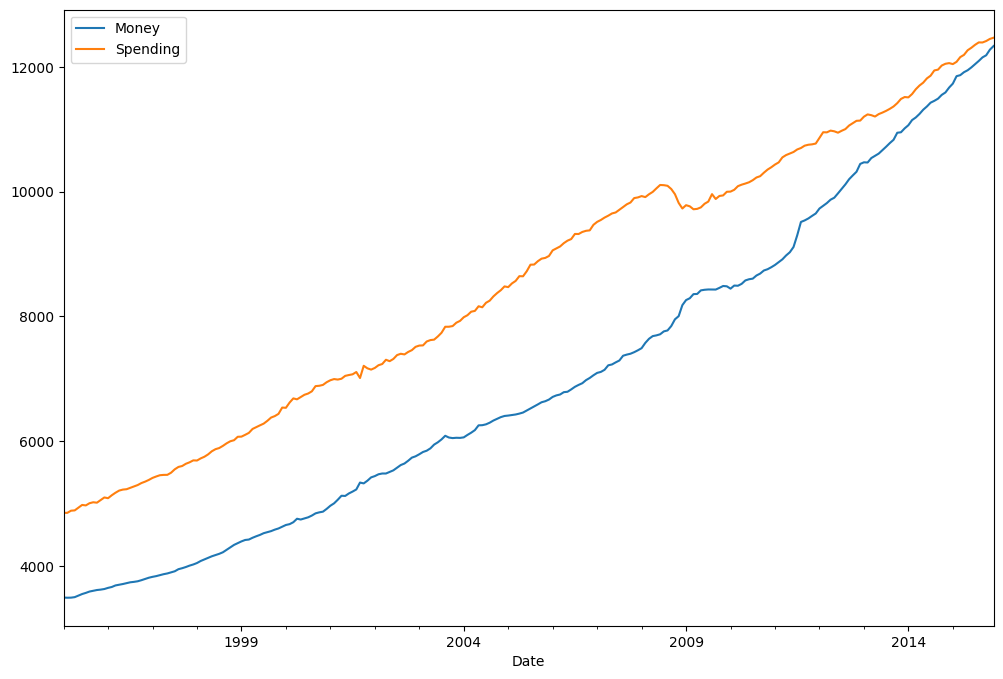

In [315]:
df.plot(figsize=(12,8))

In [317]:
df.columns

Index(['Money', 'Spending'], dtype='object')

## Stationnarity Test 

In [320]:
def adf_test(series,title=''):

    dftest = adfuller(series)
    dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# lags used', '# Observations'])

    for key, val in dftest[4].items():
        dfout[f'critical value ({key})'] = val

    print(dfout)

    if dfout.values[1] < 0.05:
        print("On rejette l'hypothèse nule donc la série est stationnaire")
    else:
        print("On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire")

In [322]:
adf_test(df['Money'])

ADF Test Statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# Observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
dtype: float64
On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire


In [324]:
adf_test(df['Spending'])

ADF Test Statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# Observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
dtype: float64
On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire


# Differenciation

In [327]:
df_transformed = df.diff()

In [329]:
df_transformed.dropna(inplace=True)

In [331]:
adf_test(df_transformed['Money'])

ADF Test Statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# Observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
dtype: float64
On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire


In [333]:
adf_test(df_transformed['Spending'])

ADF Test Statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# Observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
dtype: float64
On rejette l'hypothèse nule donc la série est stationnaire


In [335]:
df_transformed = df_transformed.diff().dropna()

In [337]:
adf_test(df_transformed['Money'])

ADF Test Statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# Observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
dtype: float64
On rejette l'hypothèse nule donc la série est stationnaire


In [339]:
adf_test(df_transformed['Spending'])

ADF Test Statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# Observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
dtype: float64
On rejette l'hypothèse nule donc la série est stationnaire


Les séries sont stationnaire après 2 différenciations

In [342]:
df_transformed.shape

(250, 2)

In [344]:
# Nombre d'observations 
nobs = 12 

In [346]:
train = df_transformed[:-nobs] # 238
test = df_transformed[-nobs:]  # 12

In [348]:
test.shape

(12, 2)

# Modèle VAR pour prendre en compte plusieurs séries temporelles simultanément

## Gridsearch for order p AE of VAR model

## k=2 donc 2 dimensions car 2 variables

In [353]:
model = VAR(train)

for p in range(1,8):
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 14.178610495220898


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




Selection de l'ordre 5 car AIC le plus bas donc p=5

In [356]:
results = model.fit(5)

In [358]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Mar, 2025
Time:                     17:54:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

## Grab 5 Lagged values (numpy arry)

Le modèle VAR fonctionne avec un certain nombre de lags (retards).
Le modèle est entraîné avec un lag de 5 (p=5) ce qui signifie que chaque observation dépend des 5 valeurs précédentes.
Sans ces valeurs passées, le modèle ne peut pas générer de prédiction

In [362]:
lagged_values = train.values[-5:]

In [364]:
z = results.forecast(y=lagged_values,steps=12)

In [366]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [368]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [370]:
idx = pd.date_range('2015-01-01', periods=12, freq='MS')

In [372]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [374]:
df_forecast = pd.DataFrame(data=z, index=idx, columns=['Money2d', 'Spending2d'])

In [376]:
df_forecast

,Money2d,Spending2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


## Clear the 2 differenciations

In [378]:
# Ajout de la dernière différence connue à la somme cumulée des différences prédites.
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Reconstruction des valeurs réelles
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

df['Money'].iloc[-nobs-1] - df['Money'].iloc[-nobs-2] = La dernière vraie différence observée avant la prévision.

Avec cumsum(), on reconstruit les valeurs originales grâce à la somme cumulée des différences prédites 

In [381]:
# Ajout de la dernière différence connue à la somme cumulée des différences prédites.
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Reconstruction des valeurs réelles
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [383]:
df_forecast.head()

,Money2d,Spending2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [389]:
test_range = df[-nobs:]

<Axes: xlabel='Date'>

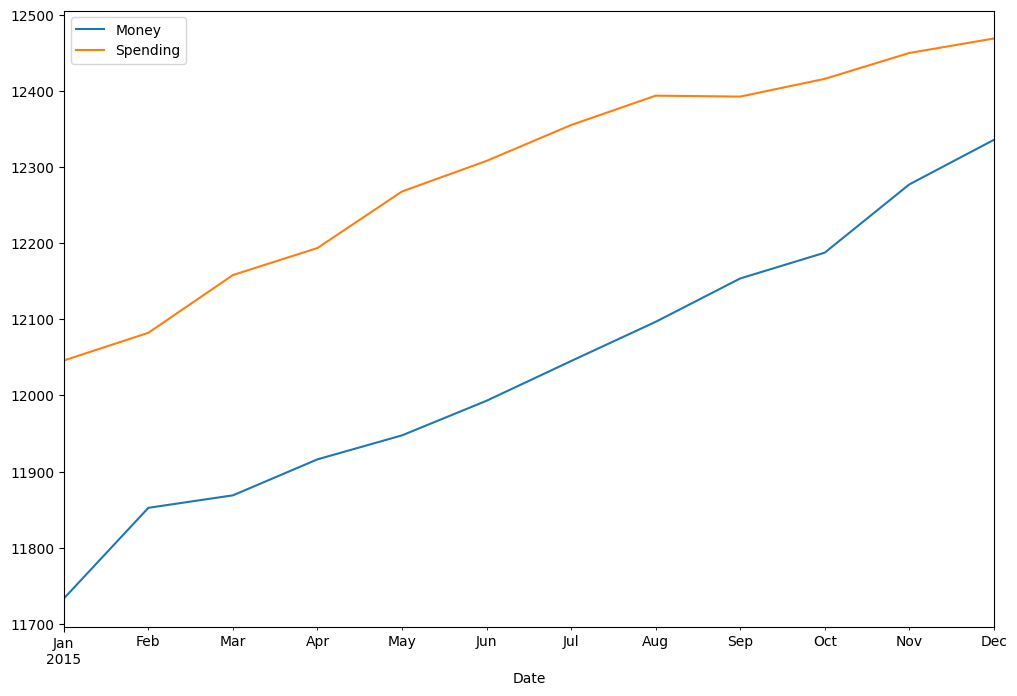

In [395]:
test_range.plot(figsize=(12,8))

In [397]:
df_forecast.columns

Index(['Money2d', 'Spending2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

<Axes: >

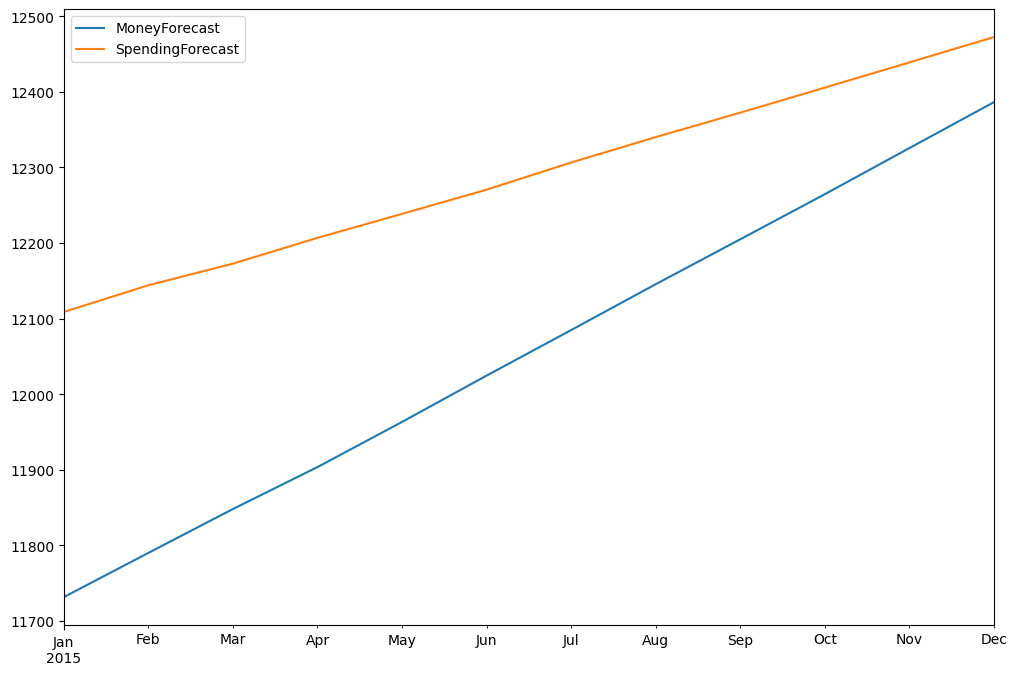

In [401]:
df_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

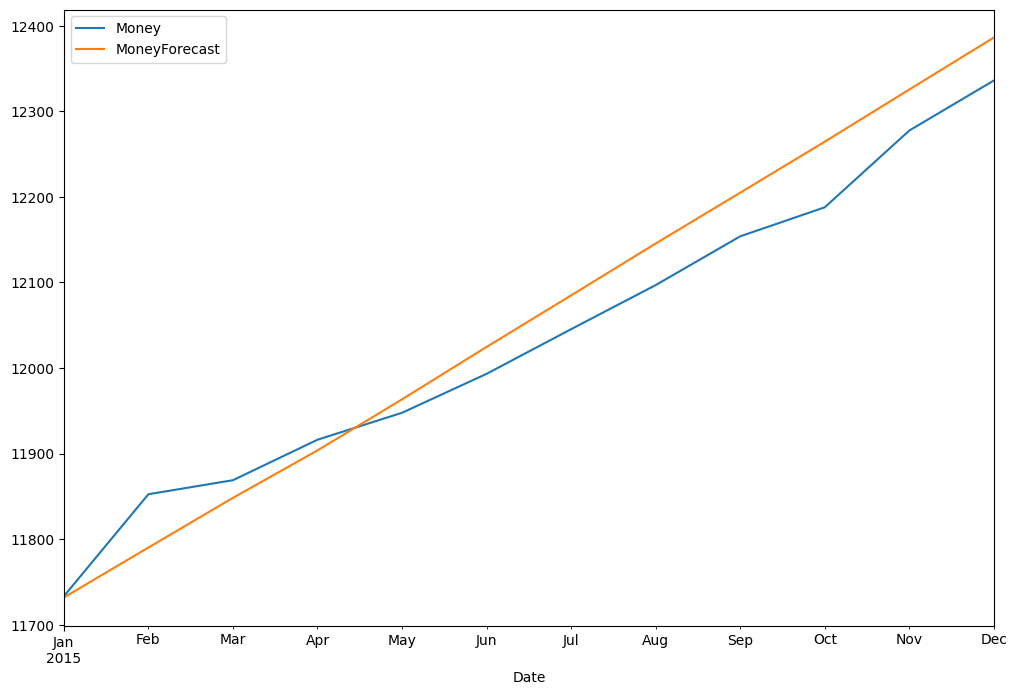

In [403]:
test_range['Money'].plot(legend=True, figsize=(12,8))
df_forecast['MoneyForecast'].plot(legend=True)

<Axes: xlabel='Date'>

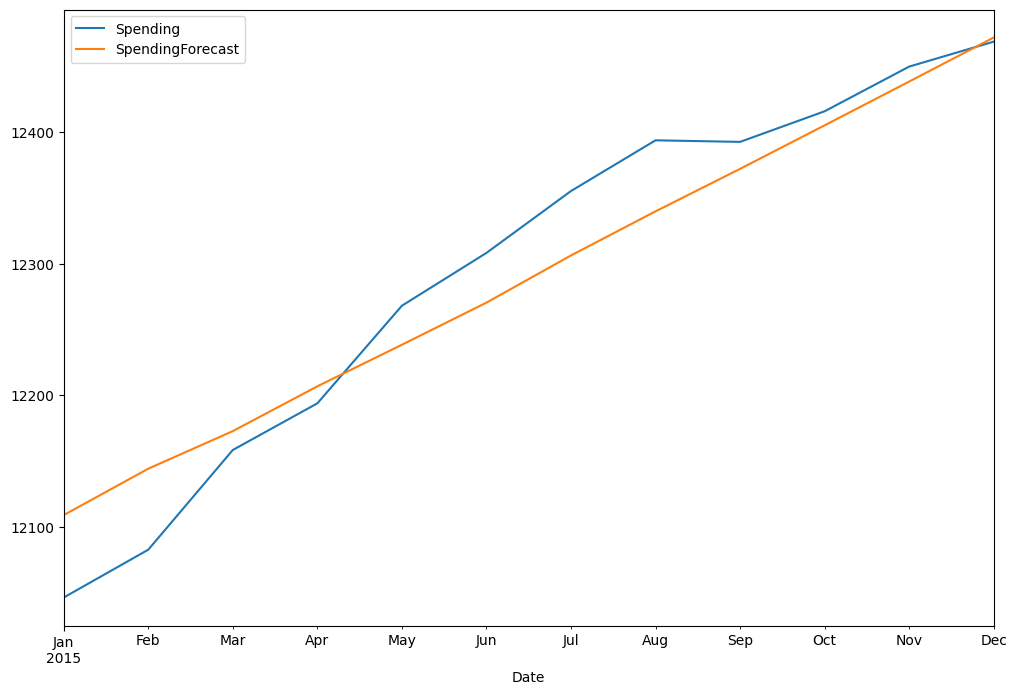

In [405]:
test_range['Spending'].plot(legend=True, figsize=(12,8))
df_forecast['SpendingForecast'].plot(legend=True)

In [409]:
rmse(test_range['Money'], df_forecast['MoneyForecast'])

43.71049653558893

In [413]:
test_range['Money'].mean()

12034.008333333333

In [411]:
rmse(test_range['Spending'], df_forecast['SpendingForecast'])

37.00117516940808

In [415]:
test_range['Spending'].mean()

12294.533333333335